# Bike Rental Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import os

In [3]:
bikesData= pd.read_csv('BikeRentalData.csv')

In [4]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [5]:
bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [6]:
# finding no. of null values in each column if presenet
bikesData.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [7]:
bikesData['yr'].unique()

array([0, 1], dtype=int64)

In [8]:
bikesData.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [11]:
#dropping dataframe columns which really doesn't matter for prediction
columnsToDrop= ['registered', 'atemp']
bikesData.drop(columnsToDrop, axis=1, inplace=True)

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


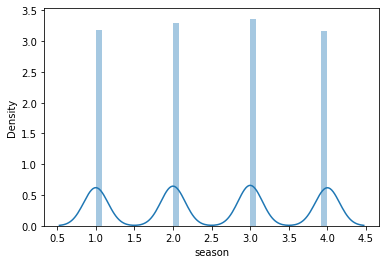

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


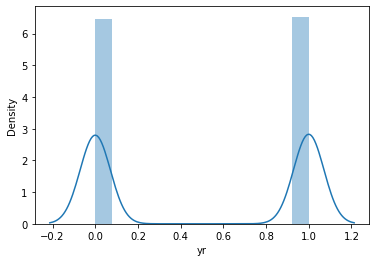

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


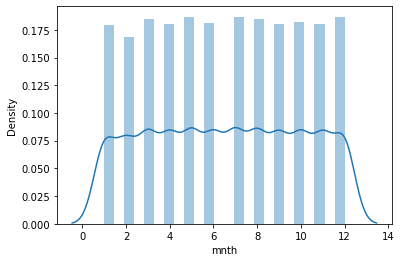

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


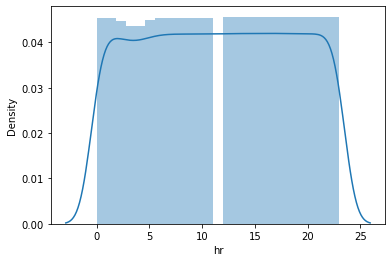

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


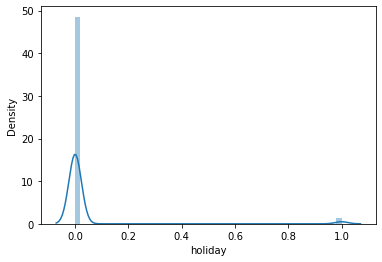

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


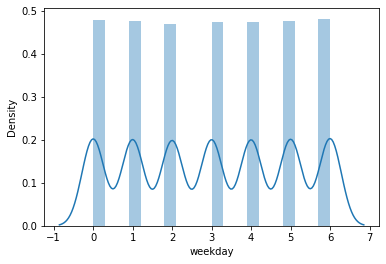

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


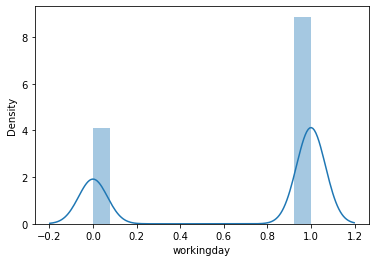

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


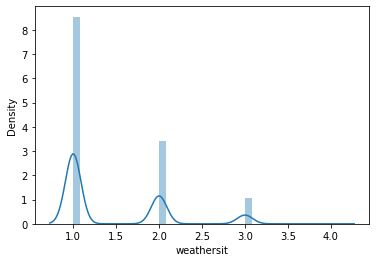

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


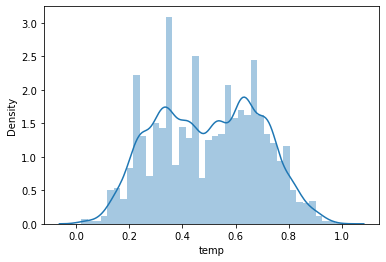

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


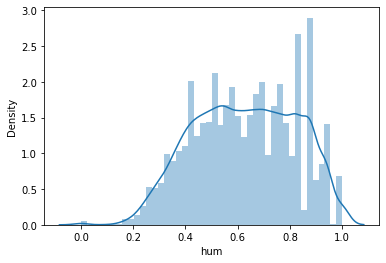

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


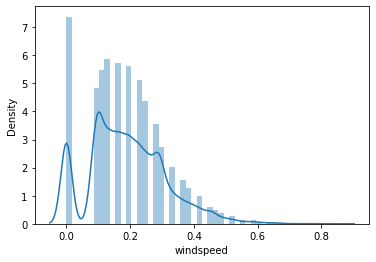

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


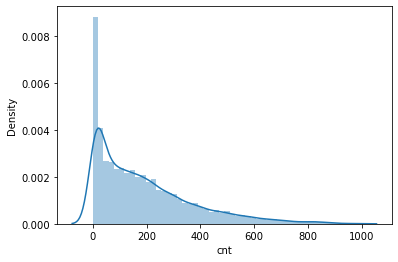

In [12]:
#visualizing distribution of data to analyze skewness & presence of outliers
columns = bikesData.columns.values
for x in columns:
    sns.distplot(bikesData[x], kde=True)
    plt.show()

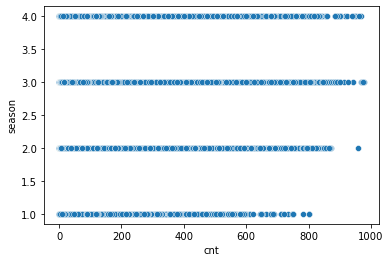

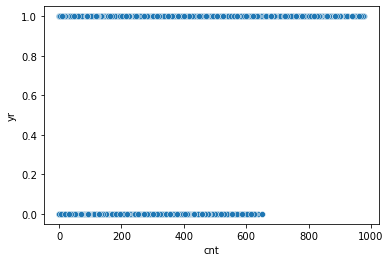

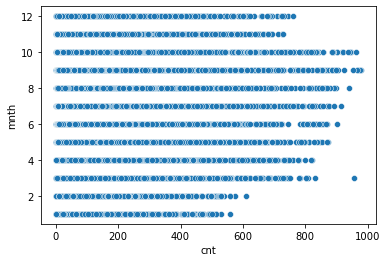

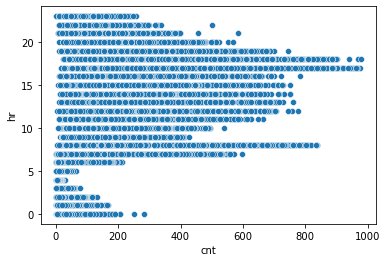

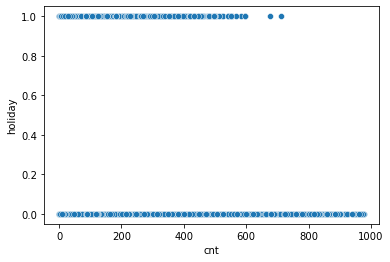

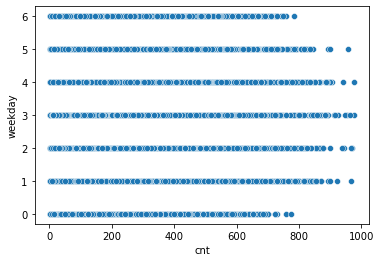

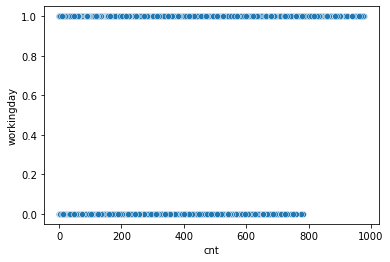

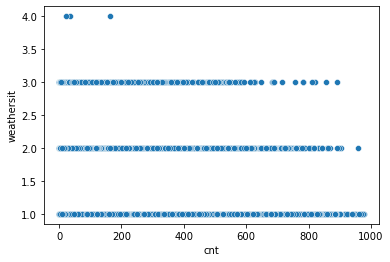

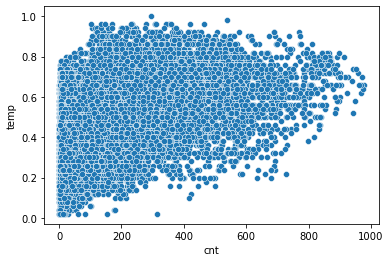

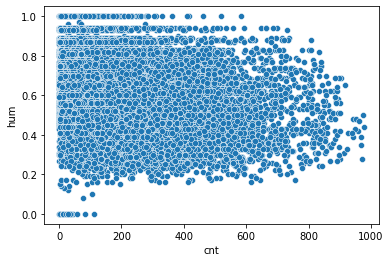

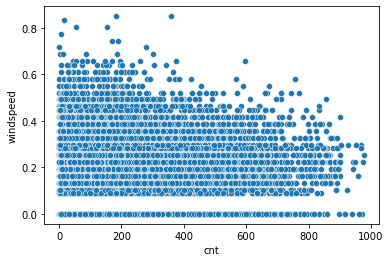

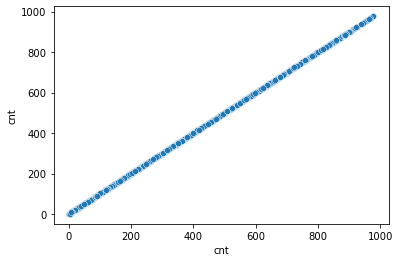

In [13]:
# visualizing relationship of variables with 'cnt'
for y in columns:
    sns.scatterplot(x='cnt', y=y, data= bikesData)
    plt.show()

<AxesSubplot:>

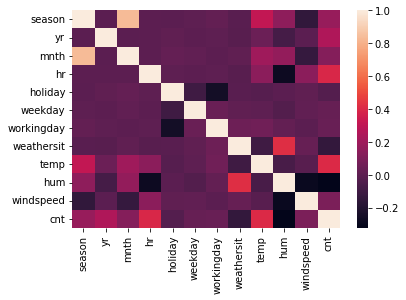

In [14]:
# correlation visualization using heatmap
sns.heatmap(bikesData.corr())

In [15]:
# using standard scaler to scale data as temp, hum & windspeed are close to normal distribution
# and these feature needs scaling as there ranges differ sinificantly
columnsToScale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
bikesData[columnsToScale]= scaler.fit_transform(bikesData[columnsToScale])

In [16]:
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.085766e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [17]:
#creating a new feature daycount
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [18]:
train_set, test_set = train_test_split(bikesData, train_size=0.7)
train_set.sort_values('dayCount', axis=0, inplace= True)
test_set.sort_values('dayCount', axis=0, inplace= True)

In [19]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import xgboost

In [21]:
trainingCols= train_set.drop(['cnt'], axis=1)
trainingLabels= train_set['cnt']
lin_reg = LinearRegression()
dec_reg = DecisionTreeRegressor(random_state=42)

## Model Selection using cross validation

In [22]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(dt_mae_scores)

dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(dt_mse_scores)

Scores: [34.4938373  68.63845522 36.62859491 41.2021364  44.40755957 78.97944079
 60.41858553 50.07319079 50.56661184 90.86430921]
Mean: 55.62727215597024
Standard deviation: 17.824748327154932
Scores: [ 51.98757041 110.4248351   60.58835742  66.04253379  73.38704365
 123.74791    102.95364552  80.99128344  84.2839177  141.92403512]
Mean: 89.63311321530644
Standard deviation: 27.73521626597032


In [23]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(lr_mae_scores)

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(lr_mse_scores)

Scores: [ 66.49477834  78.08468436 112.51177305  93.26453622  75.34326045
  96.71291772 133.17186796 160.18877938 157.8379726  125.14727764]
Mean: 109.8757847706656
Standard deviation: 31.85736802836226
Scores: [ 83.69734673 107.63088975 130.5952466  118.53658866 106.42184397
 128.58487634 176.92629289 191.35638614 204.1032816  159.18013876]
Mean: 140.70328914439
Standard deviation: 38.07606186273516


In [24]:
forest_reg = RandomForestRegressor()

rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(rf_mse_scores)

Scores: [34.20137223 34.73741167 28.79430567 31.10398521 34.88774856 57.08721217
 39.15315789 42.41025493 39.17402138 85.57725329]
Mean: 42.71267230071249
Standard deviation: 16.10913510249341
Scores: [ 46.6061107   51.76893493  45.20143581  52.40167396  58.18442844
  90.84853857  62.45461492  68.71765533  62.71613763 132.31622341]
Mean: 67.12157536984719
Standard deviation: 25.08121858922636


In [25]:
xgb_reg = XGBRegressor()

xg_mae_scores = -cross_val_score(xgb_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(xg_mae_scores)

xg_mse_scores = np.sqrt(-cross_val_score(xgb_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(xg_mse_scores)

Scores: [24.55524067 35.58143406 26.19354755 30.47223391 33.174658   40.66785249
 38.64383932 41.10625119 44.0371575  75.0931828 ]
Mean: 38.95253974799349
Standard deviation: 13.514486469311299
Scores: [ 35.40340946  52.88469632  38.01377149  46.68446359  54.16620385
  58.86915603  59.8091798   62.98627185  66.69432336 113.60805276]
Mean: 58.911952852097144
Standard deviation: 20.657644116071012


## Model Fine-Tuning

In [34]:
# from above random forest seems to be best for data.
# let us find best hyperparameters for random forest regressor

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [40,100,120,150], 'max_features':[8,10,12], 'max_depth':[15,28]}]

grid_search= GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [15, 28], 'max_features': [8, 10, 12],
                          'n_estimators': [40, 100, 120, 150]}],
             scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'max_depth': 28, 'max_features': 8, 'n_estimators': 100}

In [36]:
feature_importances = grid_search.best_estimator_
print(feature_importances)

RandomForestRegressor(max_depth=28, max_features=8)


In [38]:
#final model
final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, #min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Final Prediction

In [39]:
#predicting values from test_set and evaluating model using RMSE error
test_set.sort_values(by='dayCount', axis=0, inplace=True)
test_x_cols = (test_set.drop('cnt', axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set[test_x_cols]
y_test = test_set[test_y_cols]

In [40]:
final_model.fit(trainingCols, trainingLabels)
test_set['predictedCounts_test']= final_model.predict(X_test)
mse= mean_squared_error(y_test, test_set['predictedCounts_test'])
final_mse= np.sqrt(mse)
print(final_mse)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


40.41891559991263


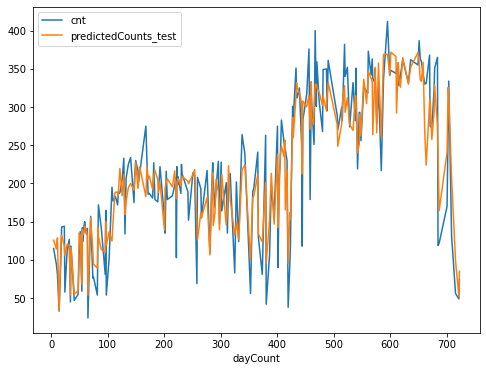

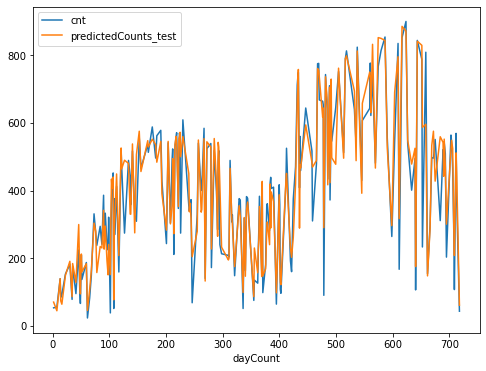

In [41]:
# finally visualizing models efficienc using line plot wrt time

times = [9,18]
for time in times:
      fig = plt.figure(figsize=(8, 6))
      fig.clf()
      ax = fig.gca()
      test_set_freg_time = test_set[test_set.hr == time]
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
      plt.show()